In [1]:
# Import necessary libraries in this cell
import pandas as pd #pandas is a library for data wrangling/handling
import numpy as np #same case for numpy

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Seaborn / matplotlib for visualization 
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()


# Matplotlib is also a very useful, basic visualization/plotting library
import matplotlib.pyplot as plt
# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline


# Provides z-score helper function,
# z-score uses standard deviation to remove outliers
# (industry standard is if a data point is 3 std devs away from mean,
# it's considered to be an outlier)
import scipy.stats as stats


# Ignore this, this is just for displaying images.
from IPython.display import Image


# Importing sklearn library
import sklearn

# Import the trees from sklearn
from sklearn import tree

# Metrics help us score our model, using metrics to evaluate our model
from sklearn import metrics

# Import our Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Import our Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# This is our Logit model
from sklearn.linear_model import LogisticRegression
# Importing our linear regression model
from sklearn.linear_model import LinearRegression

# Helper fuctions to evaluate our model from sklearn, including f1_score.
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
# Some more helpful ML function
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

# Helper function to split our data for testing and training purposes
from sklearn.model_selection import train_test_split
# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import MultinomaialNB classifier
from sklearn.naive_bayes import MultinomialNB

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC


# Library for visualizing our tree
# If you get an error, 
# run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 


# NLTK is our Natural-Language-Took-Kit
import nltk

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

# You may need to download these from nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
stopwords = stopwords.words('english')


import pickle


Bad key "text.kerning_factor" on line 4 in
C:\Users\kukai\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# NAME YOUR MODEL 
filename = 'data/comments.pkl'

## HOW TO LOAD IT FOR FUTURE USE
df = pickle.load(open(filename, 'rb'))

df

,clean_comment,category,clean_comment_profane_free,cleaned_comment
0,family mormon never tried explain still stare ...,1.0,family never tried explain still stare puzzled...,family mormon never tried explain still stare ...
1,buddhism much lot compatible christianity espe...,1.0,buddhism much lot compatible christianity espe...,buddhism much lot compatible christianity espe...
2,seriously say thing first get complex explain ...,-1.0,seriously say thing first get complex explain ...,seriously say thing first get complex explain ...
3,learned want teach different focus goal wrappi...,0.0,learned want teach different focus goal wrappi...,learned want teach different focus goal wrappi...
4,benefit may want read living buddha living chr...,1.0,benefit may want read living buddha living thi...,benefit may want read living buddha living chr...
...,...,...,...,...
201439,cocky,-1.0,,cocky
201440,transsexual,-1.0,,transsexual
201441,unfuckable,-1.0,,unfuckable
201442,bestiality,-1.0,,bestiality


In [10]:
#Seems like good practice to me, creating a single function that will call all
# our necessary functions from one place, will be subject to change
translator = str.maketrans('', '', string.punctuation)

def text_pipeline(input_str):
    input_str = remove_profanity(input_str)
    return input_str

def mk_lower(a):
    return a.lower()

def remove_stopwords(a):
    return " ".join([word for word in word_tokenize(a) if word not in stopwords])

def remove_sp_char(a):
    ## \s for white space, ^ is negation, \w is words.  so replace all punctutation that follows a word 
    return a.translate(translator)

def remove_sp_char2(a):
    return re.sub(r"[^\w\s]", "", a)
    
    
def text_pipeline2(a):
    a = mk_lower(a)
    a = remove_sp_char(a)
    a = remove_stopwords(a)
    return a

In [3]:
mask1 = df["category"] == -1

df.loc[mask1, 'category'] = 0
print(df["category"].unique())

[1. 0.]


In [14]:
new_df = pd.DataFrame()
new_df["clean_comment"] = df["clean_comment_profane_free"].copy()
new_df["category"] = df["category"].copy()
new_df.dropna(inplace=True)

print(new_df.shape)

(201444, 2)


In [5]:


X = df["clean_comment"].values
y = df["category"].values



In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X)

X = vectorizer.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

Model Accuracy: 0.767108


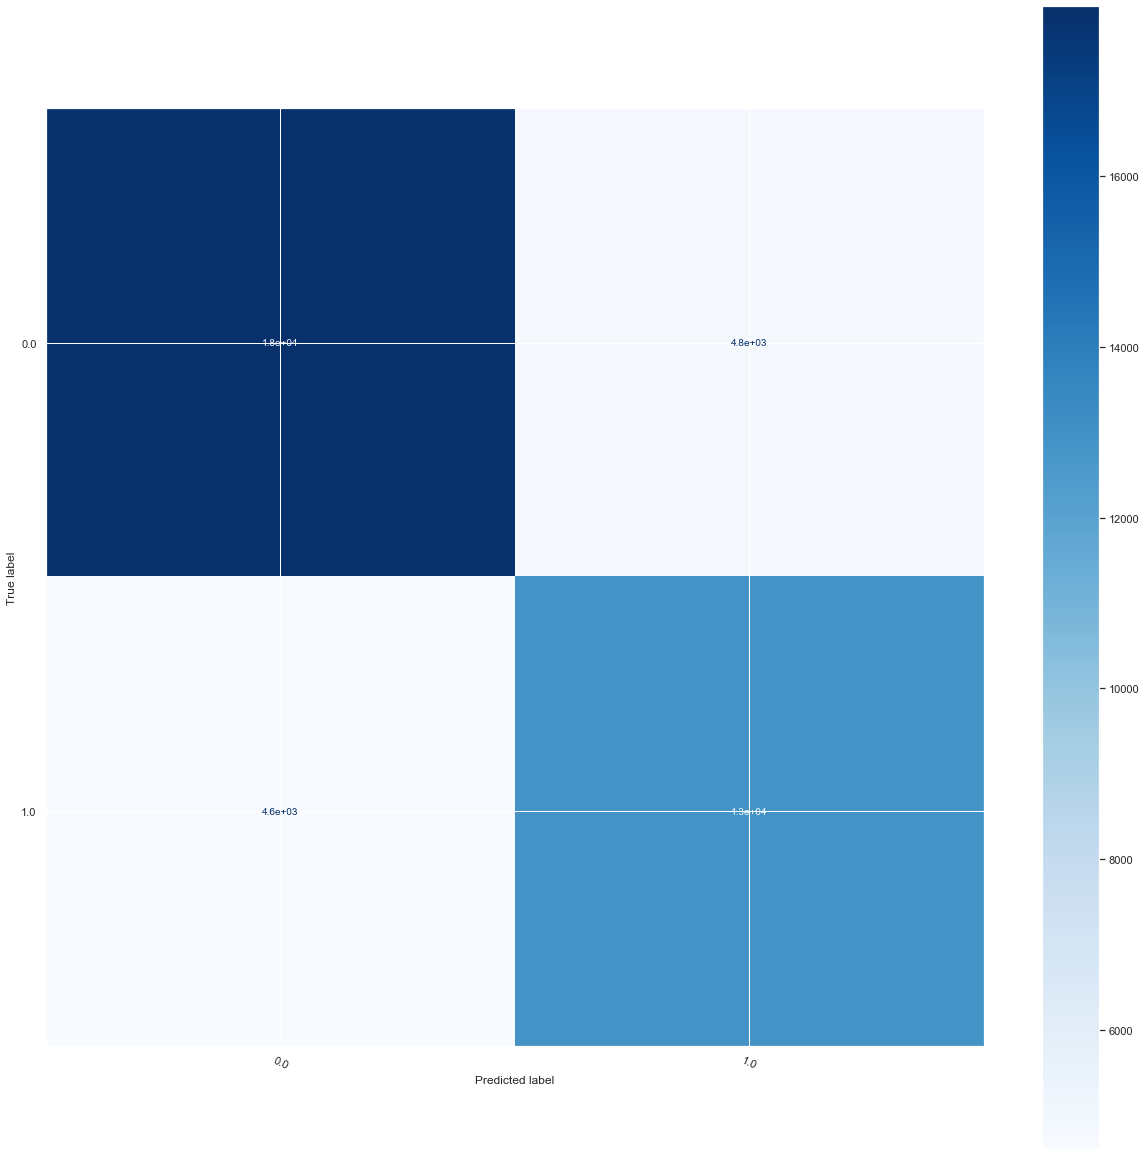

In [8]:
model = MultinomialNB(alpha=.05)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=-25)
disp

In [24]:
my_sentences = [
"""hello, my name is kukai and do you want to talk about the one and only god, thighs""",
"""I hate you you should delete your twitter account""",
"""thanks for the recent support.  :)""",
"""imagine being called a CONTENT CREATOR with people donating $5 for everything""",
"cafeteria has new good fries",
" I hate the new cafeteria french fries",
"fuck"
]

for sentence in my_sentences:
    print(sentence)
    # 1. Apply the text pipeline to your sentence
    input_text = text_pipeline2(sentence)
    # 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
    input_vec = vectorizer.transform([input_text])
    # 3. Use the model to predict your new `X`. 
    model.predict(input_vec)
    # 4. Print the prediction
    pp = model.predict_proba(input_vec)
    p_val = []
    for c, p in zip(model.classes_, pp.round(3)[0]):
        p_val.append(p)
        print(c, p)
    if p_val[0] > 0.65:
        print("REJECT")
    elif p_val[1] > 0.65:
        print("ACCEPT")
    else:print("meh, indecisive?")
    

hello, my name is kukai and do you want to talk about the one and only god, thighs
0.0 0.152
1.0 0.848
ACCEPT
I hate you you should delete your twitter account
0.0 0.884
1.0 0.116
REJECT
thanks for the recent support.  :)
0.0 0.265
1.0 0.735
ACCEPT
imagine being called a CONTENT CREATOR with people donating $5 for everything
0.0 0.746
1.0 0.254
REJECT
cafeteria has new good fries
0.0 0.393
1.0 0.607
meh, indecisive?
 I hate the new cafeteria french fries
0.0 0.841
1.0 0.159
REJECT
fuck
0.0 0.863
1.0 0.137
REJECT
